In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import mglearn
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score 

In [2]:
# 1. Selecting dataset

df = pd.read_csv('weather.csv')
df.head(5)

,Station,Date,MaxT,MinT,RH1,RH2,Wind,Rain,SSH,Evap,...,Cum_Rain,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,ICRISAT,1/1/1978,28.5,14.2,68,31.0,5.7,0.0,10.1,4.3,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ICRISAT,1/2/1978,28.8,16.0,79,33.0,6.4,0.0,9.8,4.8,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ICRISAT,1/3/1978,29.0,14.5,86,37.0,5.4,0.0,9.1,4.6,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ICRISAT,1/4/1978,29.0,18.0,89,43.0,7.1,0.0,9.0,4.2,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ICRISAT,1/5/1978,27.8,17.0,81,47.0,10.5,0.0,8.9,4.3,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# 2: Transforming & cleaning data
dataset = df.drop(['Unnamed: 15','Unnamed: 16','Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22','Unnamed: 23'], axis=1)

In [4]:
# Get the datatype info of each attribute
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14853 entries, 0 to 14852
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Station    14853 non-null  object 
 1   Date       14853 non-null  object 
 2   MaxT       14853 non-null  float64
 3   MinT       14853 non-null  float64
 4   RH1        14853 non-null  int64  
 5   RH2        14853 non-null  float64
 6   Wind       14853 non-null  float64
 7   Rain       14853 non-null  float64
 8   SSH        14853 non-null  float64
 9   Evap       14853 non-null  float64
 10  Radiation  14852 non-null  float64
 11  FAO56_ET   14853 non-null  float64
 12  Lat        14853 non-null  float64
 13  Lon        14853 non-null  float64
 14  Cum_Rain   14853 non-null  float64
dtypes: float64(12), int64(1), object(2)
memory usage: 1.7+ MB


In [5]:
# Check if there is any null values in the dataset
dataset.isnull().sum()

Station      0
Date         0
MaxT         0
MinT         0
RH1          0
RH2          0
Wind         0
Rain         0
SSH          0
Evap         0
Radiation    1
FAO56_ET     0
Lat          0
Lon          0
Cum_Rain     0
dtype: int64

In [6]:
# Get descriptive statistics of all attributes and eye-balling for any outliers in the dataset
dataset.describe()

,MaxT,MinT,RH1,RH2,Wind,Rain,SSH,Evap,Radiation,FAO56_ET,Lat,Lon,Cum_Rain
count,14853.000000,14853.000000,14853.000000,14853.000000,14853.000000,14853.000000,14853.000000,14853.000000,14852.000000,14853.000000,1.485300e+04,1.485300e+04,14853.000000
mean,32.055807,19.568720,81.586481,43.550549,8.692278,2.460378,7.457052,6.420043,17.877027,4.808901,1.750841e+01,7.827230e+01,386.065347
std,4.115165,4.504939,15.055169,19.613665,4.795461,9.346085,3.341868,3.132334,4.508112,1.816996,3.932986e-12,7.688331e-12,398.752032
min,16.500000,4.500000,17.000000,6.300000,0.200000,0.000000,0.000000,0.000000,0.800000,0.400000,1.750841e+01,7.827230e+01,0.000000
25%,29.000000,16.500000,75.000000,28.000000,5.200000,0.000000,5.500000,4.200000,15.500000,3.500000,1.750841e+01,7.827230e+01,29.600000
50%,31.000000,21.000000,87.000000,40.000000,7.600000,0.000000,8.800000,5.600000,18.200000,4.400000,1.750841e+01,7.827230e+01,225.400000
75%,35.000000,22.600000,93.000000,57.000000,11.200000,0.000000,10.100000,8.300000,21.100000,5.900000,1.750841e+01,7.827230e+01,687.700000
max,43.500000,30.600000,100.000000,100.000000,56.000000,263.600000,12.400000,19.700000,28.300000,13.600000,1.750841e+01,7.827230e+01,1520.400000


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Wind'>

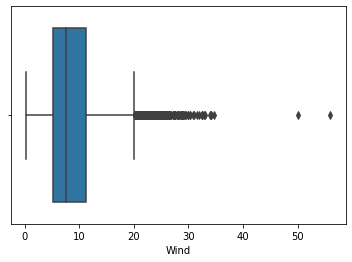

In [7]:
# Plot the "Wind" attribute to see if there are outliers
sns.boxplot(dataset['Wind'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Wind'>

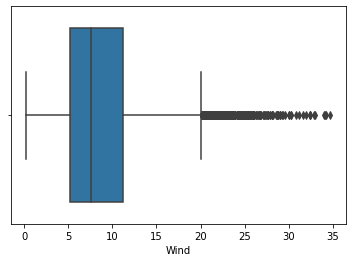

In [8]:
# Remove the row where the outlier for "Wind" were found
dataset = dataset.drop(dataset[dataset['Wind'] > 40].index,axis = 0)
sns.boxplot(dataset['Wind'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rain'>

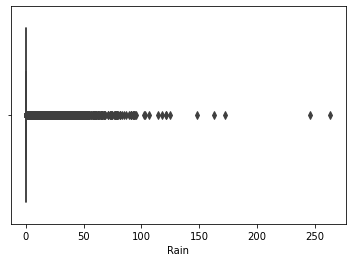

In [9]:
# Plot the "Rain" attribute to see if there are outliers
sns.boxplot(dataset['Rain'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rain'>

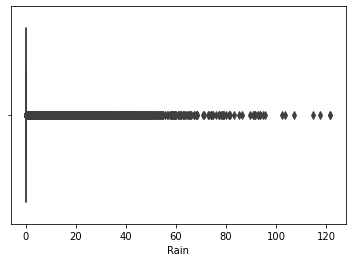

In [10]:
# Remove the row where the outlier for "Rain" were found
dataset = dataset.drop(dataset[dataset['Rain'] > 125].index,axis = 0)
sns.boxplot(dataset['Rain'])

In [11]:
# Check for why the values are concentrated around 0.0
dataset[dataset['Rain'] == 0]

,Station,Date,MaxT,MinT,RH1,RH2,Wind,Rain,SSH,Evap,Radiation,FAO56_ET,Lat,Lon,Cum_Rain
0,ICRISAT,1/1/1978,28.5,14.2,68,31.0,5.7,0.0,10.1,4.3,18.4,3.9,17.508409,78.2723,0.0
1,ICRISAT,1/2/1978,28.8,16.0,79,33.0,6.4,0.0,9.8,4.8,16.9,3.9,17.508409,78.2723,0.0
2,ICRISAT,1/3/1978,29.0,14.5,86,37.0,5.4,0.0,9.1,4.6,15.3,3.4,17.508409,78.2723,0.0
3,ICRISAT,1/4/1978,29.0,18.0,89,43.0,7.1,0.0,9.0,4.2,16.4,3.8,17.508409,78.2723,0.0
4,ICRISAT,1/5/1978,27.8,17.0,81,47.0,10.5,0.0,8.9,4.3,15.9,4.1,17.508409,78.2723,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,ICRISAT,24-Aug-2018,29.5,22.4,88,69.0,10.6,0.0,2.1,4.0,14.0,3.7,17.508409,78.2723,1488.7
14846,ICRISAT,25-Aug-2018,30.2,23.0,85,60.0,10.9,0.0,9.4,5.2,19.0,4.8,17.508409,78.2723,1488.7
14847,ICRISAT,26-Aug-2018,30.2,23.0,87,61.0,10.0,0.0,5.3,4.3,18.3,4.6,17.508409,78.2723,1488.7
14851,ICRISAT,30-Aug-2018,30.6,23.0,87,59.0,8.2,0.0,9.8,5.2,19.7,4.7,17.508409,78.2723,1520.4


Text(0, 0.5, 'Precipitation in inches')

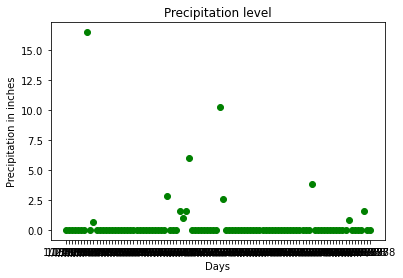

In [12]:
# plt.scatter(dataset['Rain'], x_vis[x_vis.columns.values[i][:100]],                                               color = 'g')
# plt.scatter(days[day_index], x_vis[x_vis.columns.values[i]][day_index], color ='r')
# plt.title(x_vis.columns.values[i])

plt.scatter(dataset['Date'][:100], dataset['Rain'][:100], color = 'g')
# plt.scatter(days[day_index], Y[day_index], color ='r')
plt.title("Precipitation level")
plt.xlabel("Days")
plt.ylabel("Precipitation in inches")

In [13]:
# Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(['Station','Date','Cum_Rain','Radiation', 'Rain'], axis=1), dataset["Rain"], random_state=0)

In [14]:
# Get the shape of the train and test set

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11133, 10)
(3712, 10)
(11133,)
(3712,)


In [15]:
#3: Validate the data
dataset.describe()

,MaxT,MinT,RH1,RH2,Wind,Rain,SSH,Evap,Radiation,FAO56_ET,Lat,Lon,Cum_Rain
count,14845.000000,14845.000000,14845.000000,14845.000000,14845.000000,14845.000000,14845.000000,14845.000000,14844.000000,14845.000000,1.484500e+04,1.484500e+04,14845.000000
mean,32.058073,19.568582,81.580936,43.535487,8.683921,2.386298,7.459818,6.422034,17.881494,4.809411,1.750841e+01,7.827230e+01,385.950037
std,4.114003,4.505847,15.056858,19.600830,4.767411,8.523452,3.339594,3.131628,4.502697,1.815459,3.932987e-12,7.730965e-12,398.698962
min,16.500000,4.500000,17.000000,6.300000,0.200000,0.000000,0.000000,0.000000,0.800000,0.400000,1.750841e+01,7.827230e+01,0.000000
25%,29.000000,16.500000,75.000000,28.000000,5.200000,0.000000,5.500000,4.200000,15.500000,3.500000,1.750841e+01,7.827230e+01,29.600000
50%,31.000000,21.000000,87.000000,40.000000,7.600000,0.000000,8.800000,5.600000,18.200000,4.400000,1.750841e+01,7.827230e+01,225.400000
75%,35.000000,22.600000,93.000000,57.000000,11.200000,0.000000,10.100000,8.300000,21.100000,5.900000,1.750841e+01,7.827230e+01,687.700000
max,43.500000,30.600000,100.000000,100.000000,34.700000,121.600000,12.400000,19.700000,28.300000,13.600000,1.750841e+01,7.827230e+01,1520.400000


In [16]:
dataset1= dataset.drop(['Station','Date','Cum_Rain','Radiation'],axis=1)

In [17]:
#4 Preprocess with MinMaxscale
minmax = MinMaxScaler()
minmax.fit(X_train)

X_scaled_train = minmax.transform(X_train)
X_scaled_test = minmax.transform(X_test)

#5 Reduce the dimensionality with PCA
pca = PCA(n_components=2)
pca.fit(X_scaled_train)

X_pca_train = pca.transform(X_scaled_train)
X_pca_test=pca.transform(X_scaled_test)

In [18]:
#6 Train data on SVR

svr = SVR()
svr.fit(X_pca_train,y_train)
print('Training Accuracy', svr.score(X_pca_train,y_train))
print('Testing Accuracy', svr.score(X_pca_test,y_test))

# The SVR models seem to be more underfitting than linear regression meaning that it does not perform well

Training Accuracy 0.07309561075983906
Testing Accuracy 0.06263194174787756


In [19]:
#6 Train data on Random Forest Regressor

forest = RandomForestRegressor(n_estimators=100, max_depth= 3)
forest.fit(X_pca_train, y_train)
print('Training Accuracy',forest.score(X_pca_train,y_train))
print('Testing Accuracy',forest.score(X_pca_test,y_test))

# The Random Forest Regressor models seem to be underfitting meaning that it does not perform well

Training Accuracy 0.23268488272474852
Testing Accuracy 0.20801723848525233


In [20]:
#6 Train data on Ridge Regression

ridge = Ridge().fit(X_pca_train, y_train)
print("Training set score:",ridge.score(X_pca_train, y_train))
print("Test set score:",ridge.score(X_pca_test, y_test))

# The Linear Regression models seem to be underfitting like Linear Regression meaning that it does not perform that well

Training set score: 0.14015042390768306
Test set score: 0.13839454032347898


In [21]:
#6 Train data on Grid Search CV

param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(Ridge(), param_grid, cv = 5)
grid.fit(X_train, y_train)

print("Best parameters: {}".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Test set score: {:.2f}".format(grid.score(X_test, y_test)))

# The Grid Search CV models seem to be underfitting as training and test score are the same
# meaning that it does not perform that well

Best parameters: {'alpha': 100}
Best cross-validation score: 0.19
Test set score: 0.18


In [22]:
select = SelectFromModel(RandomForestRegressor(n_estimators=1))

param_grid = [
    {'preprocessing': [MinMaxScaler()],
     'classifier': [RandomForestRegressor()],
     'classifier__n_estimators':[1]},
    
    {'preprocessing': [MinMaxScaler()],
     'classifier': [SVR()],
     'classifier__C': [0.01, 0.1,1, 10, 100],
      'classifier__gamma': [0.01, 0.1,1, 10, 100]},
    
    {'preprocessing': [MinMaxScaler()],
     'classifier': [Ridge()],
     'classifier__alpha': [0.01, 0.1,1, 10, 100]}
]

pipe = Pipeline(
    [('preprocessing', MinMaxScaler()),
     ('selection',select),
     ('classifier', RandomForestRegressor())])
fold = KFold(n_splits = 5, shuffle = True)
grid = GridSearchCV(pipe, param_grid, cv = fold, n_jobs=-1)

grid.fit(X_pca_train,y_train)
grid.score(X_pca_test,y_test)

print("Best parameters: {}".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Test set score: {:.2f}".format(grid.score(X_pca_test, y_test)))

Best parameters: {'classifier': Ridge(alpha=1), 'classifier__alpha': 1, 'preprocessing': MinMaxScaler()}
Best cross-validation score: 0.12
Test set score: 0.11


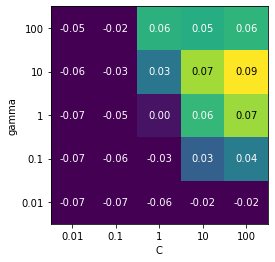

In [23]:
# display the heat map of SVR Grid Search CV
result = pd.DataFrame(grid.cv_results_)

result = result.drop([0], axis=0)
result = result.drop(list(range(26, 31)), axis=0)


mglearn.tools.heatmap(np.array(result['mean_test_score']).reshape(5, -1),
                      xlabel="C", ylabel="gamma",
                      xticklabels=param_grid[1]['classifier__C'],
                      yticklabels=param_grid[1]['classifier__gamma'], vmin=0)
#Our optimum parameter is on the border where we might need to expand the parameter set

In [24]:
pred_most_frequent = grid.predict(X_pca_test)

In [28]:
R_square = r2_score(y_test,pred_most_frequent) 
print('R_square is', R_square) 

R_square is 0.11360384186136241


In [ ]:
#We use preprocessing with MinMaxScaler to shift data feature between 0 and 1. We reduce dimensionality with PCA
#After that, we use SVR, RandomForestRegression and Ridge. All the model are underfitting while RandomForestRegression give us the best score
#We choose these model because they are appropriate for our data which is the regression 
#Gridsearch CV seems not perform well with best parameter with ridge regression with alpha =1 
#We choose to use R_square score because the model is regression.